In [6]:
#import libraries
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import os
from tensorflow.keras.models import *
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing import image

In [7]:
#get current working directory
current_dir = os.getcwd()

#paths
# train_path = "C:/Users/Admin/python/S6SoftwareEngineer/E_Commerce_Recognition/ML/dataset/train"
# test_path = "C:/Users/Admin/python/S6SoftwareEngineer/E_Commerce_Recognition/ML/dataset/test"
# val_path = "C:/Users/Admin/python/S6SoftwareEngineer/E_Commerce_Recognition/ML/dataset/validation"
# image_category =os.listdir("C:/Users/Admin/python/S6SoftwareEngineer/E_Commerce_Recognition/ML/dataset/train")
dataset_dir = os.path.join(current_dir, "dataset")
train_path = os.path.join(dataset_dir, "train")
test_path = os.path.join(dataset_dir, "test")
val_path = os.path.join(dataset_dir, "validation")
image_category = os.listdir(train_path)

In [8]:
#plot the dataset
def plot_image (image_category):
    
    plt.figure(figsize=(10,10))

    for i, catrgory in enumerate(image_category):

        image_path = train_path + '/' + catrgory
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_in_path = image_path+'/'+ first_image
        img= image.load_img(first_image_in_path)
        img_array = image.img_to_array(img) /255
        plt.subplot(7,6,i+1)
        plt.imshow(img_array)
        plt.title(catrgory)
        plt.axis('off')
    plt.show()

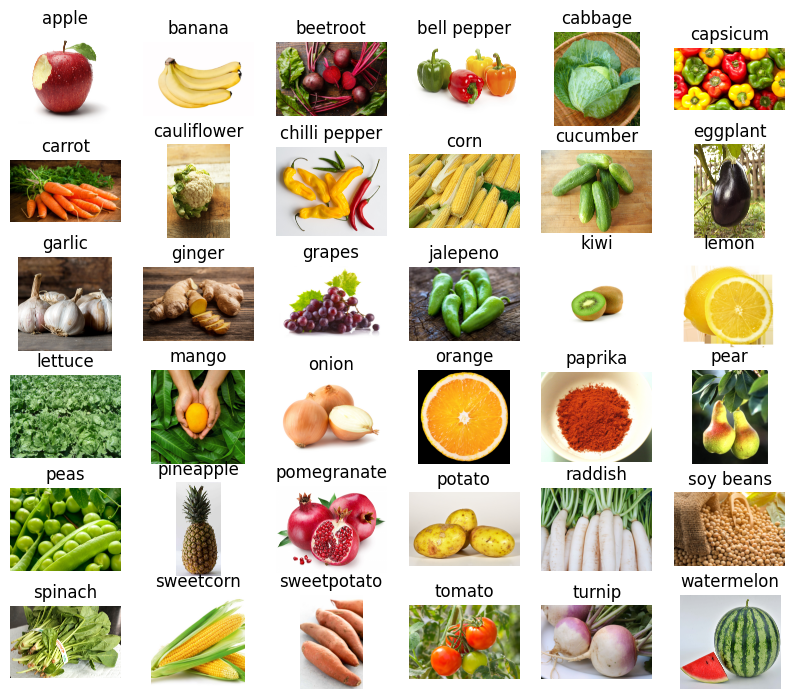

In [9]:
plot_image (image_category)

In [10]:
#Apply the suitable Image Preprocessing by using ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_generator.flow_from_directory(
                                                train_path,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )

test_generator = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = test_generator.flow_from_directory(
                                                test_path,
                                             target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )
val_generator = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = val_generator.flow_from_directory(
                                                val_path,
                                               target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )


Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [11]:
#build CNN Model 
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = 3,  padding = 'same', activation = 'relu',
                     input_shape = (224, 224, 3)))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',  activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters = 128, kernel_size = 3,  padding = 'same',   activation = 'relu'))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters=265, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(36, activation = 'softmax'))


In [12]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 1, 1, 265)      │       305,545 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 265)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,181,485 (4.51 MB)

 Trainable params: 1,181,485 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#compiler
cnn_model.compile(
    optimizer='Adam', 
    loss ='categorical_crossentropy', 
    metrics=['accuracy'])

In [14]:
#fit
model_history = cnn_model.fit(train_image_generator,
                             epochs =10 ,
                             validation_data = val_image_generator,
                             )

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.0248 - loss: 3.5837 - val_accuracy: 0.0256 - val_loss: 3.5842
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.0326 - loss: 3.5829 - val_accuracy: 0.0256 - val_loss: 3.5845
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.0349 - loss: 3.5794 - val_accuracy: 0.0370 - val_loss: 3.5545
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.0474 - loss: 3.4489 - val_accuracy: 0.0598 - val_loss: 3.1278
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.0640 - loss: 3.1929 - val_accuracy: 0.0655 - val_loss: 3.0314
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.0677 - loss: 3.0933 - val_accuracy: 0.1054 - val_loss: 2.9112
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.0870 - loss: 2.9846 - val_accuracy: 0.1254 - val_loss: 2.8393
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.1043 - loss: 2.9343 - val_accuracy: 0.1396 - v

In [15]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_history_2 = model.fit(
                         train_image_generator,
                             epochs =10 ,
                             validation_data = val_image_generator,
                               batch_size = 32,
     
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.3402 - loss: 2.5500 - val_accuracy: 0.8604 - val_loss: 0.4687
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8081 - loss: 0.6191 - val_accuracy: 0.8889 - val_loss: 0.3430
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.8719 - loss: 0.3869 - val_accuracy: 0.9459 - val_loss: 0.2022
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8837s 91s/step - accuracy: 0.9332 - loss: 0.2221 - val_accuracy: 0.9402 - val_loss: 0.1734
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9560 - loss: 0.1442 - val_accuracy: 0.9516 - val_loss: 0.1730
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9777 - loss: 0.0967 - val_accuracy: 0.9630 - val_loss: 0.1617
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9833 - loss: 0.0728 - val_accuracy: 0.9715 - val_loss: 0.1377
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9807 - loss: 0.0672 - val_accuracy: 0.9573 -

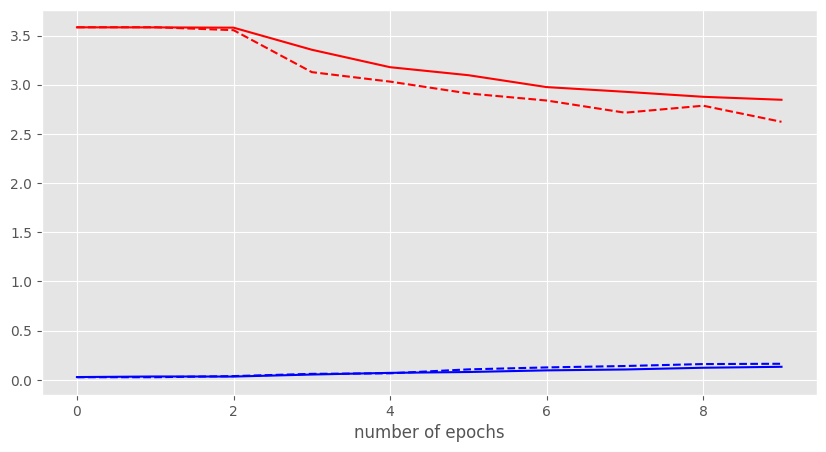

In [16]:
#ploting the output accuarcy

#plot history of loss and accuracy
hist = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()

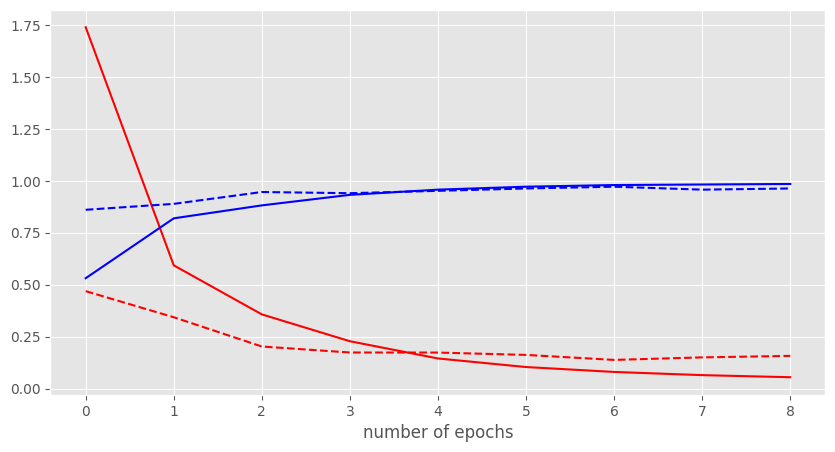

In [17]:
#plot history of loss and accuracy
hist = model_history_2.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()

In [18]:
#evaluate
cnn_model.evaluate(test_image_generator)
cnn_model.evaluate(train_image_generator)
cnn_model.evaluate(val_image_generator)

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.1652 - loss: 2.6207
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 766ms/step - accuracy: 0.1467 - loss: 2.8093
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 920ms/step - accuracy: 0.1515 - loss: 2.6243


[2.623365640640259, 0.16239316761493683]

In [19]:
model.evaluate(test_image_generator)
model.evaluate(train_image_generator)
model.evaluate(val_image_generator)

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9750 - loss: 0.1285
98/98 ━━━━━━━━━━━━━━━━━━━━ 92s 935ms/step - accuracy: 0.9886 - loss: 0.0525
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9693 - loss: 0.1327


[0.13720868527889252, 0.9715099930763245]

In [20]:
labels = {value: key for key, value in train_image_generator.class_indices.items()}

print("Label Mappings for classes \n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes 

0 : apple
1 : banana
2 : beetroot
3 : bell pepper
4 : cabbage
5 : capsicum
6 : carrot
7 : cauliflower
8 : chilli pepper
9 : corn
10 : cucumber
11 : eggplant
12 : garlic
13 : ginger
14 : grapes
15 : jalepeno
16 : kiwi
17 : lemon
18 : lettuce
19 : mango
20 : onion
21 : orange
22 : paprika
23 : pear
24 : peas
25 : pineapple
26 : pomegranate
27 : potato
28 : raddish
29 : soy beans
30 : spinach
31 : sweetcorn
32 : sweetpotato
33 : tomato
34 : turnip
35 : watermelon


In [21]:
ModelLoss, ModelAccuracy = cnn_model.evaluate(test_image_generator)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 867ms/step - accuracy: 0.1716 - loss: 2.5893
Test Loss is 2.6349234580993652
Test Accuracy is 0.16155989468097687


In [22]:
ModelLoss, ModelAccuracy = model.evaluate(test_image_generator)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9669 - loss: 0.1791
Test Loss is 0.1277317851781845
Test Accuracy is 0.9721448421478271


In [23]:
class_map = dict([v,k] for k,v in train_image_generator.class_indices.items())
print(class_map)

{0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce', 19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}


In [24]:
import numpy as np
test_image_path = os.path.join(dataset_dir, "Image_1.jpg")
def predictions(test_image_path):

    #load and preprocessing image
    test_img = image.load_img(test_image_path, target_size = (224, 224))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))

    # prediction
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_label]
    return predicted_img



In [25]:
predictions(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'bell pepper'